🔍 Số khuôn mặt tìm thấy: 4


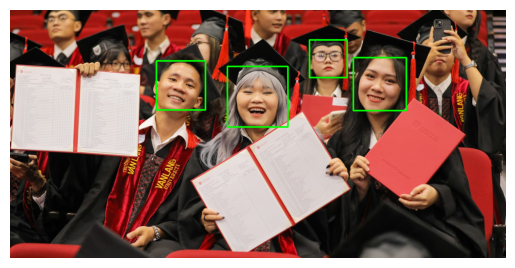

In [3]:
import cv2
import matplotlib.pyplot as Quan

# Đọc ảnh
image_path = "/content/face.jpg"  # Đảm bảo bạn đã tải ảnh này lên Colab
face_cascade_path = "/content/haarcascade_frontalface_default.xml"  # Đường dẫn file XML

# Đọc ảnh gốc
img = cv2.imread(image_path)

# Kiểm tra nếu ảnh không tồn tại
if img is None:
    print("⚠️ Không thể đọc ảnh! Kiểm tra lại đường dẫn hoặc tải ảnh lên.")
else:
    # Chuyển ảnh sang grayscale để xử lý
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Chuyển ảnh sang RGB để hiển thị đúng màu trong matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tải mô hình Haar Cascade nhận diện khuôn mặt
    face_cascade = cv2.CascadeClassifier(face_cascade_path)

    # Phát hiện khuôn mặt
    faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Kiểm tra số khuôn mặt tìm thấy
    print(f"🔍 Số khuôn mặt tìm thấy: {len(faces)}")

    # Vẽ hình chữ nhật quanh các khuôn mặt
    for (x, y, w, h) in faces:
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Hiển thị ảnh với khuôn mặt đã được nhận diện
    Quan.imshow(img_rgb)
    Quan.axis("off")
    Quan.show()


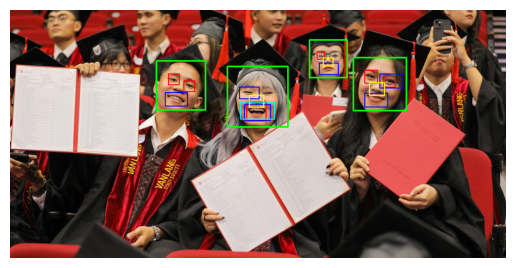

In [4]:
import cv2
import matplotlib.pyplot as Quan

# Đường dẫn file ảnh
image_path = "/content/face.jpg"

# Đường dẫn các file XML
face_cascade_path = "/content/haarcascade_frontalface_default.xml"
eye_cascade_path = "/content/haarcascade_eye.xml"
mouth_cascade_path = "/content/haarcascade_mcs_mouth.xml"
nose_cascade_path = "/content/haarcascade_mcs_nose.xml"
smile_cascade_path = "/content/haarcascade_smile.xml"

# Đọc ảnh
img = cv2.imread(image_path)
if img is None:
    print("⚠️ Không thể đọc ảnh! Hãy kiểm tra lại.")
else:
    # Chuyển ảnh sang grayscale để nhận diện
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load các mô hình Haar Cascade
    face_cascade = cv2.CascadeClassifier(face_cascade_path)
    eye_cascade = cv2.CascadeClassifier(eye_cascade_path)
    mouth_cascade = cv2.CascadeClassifier(mouth_cascade_path)
    nose_cascade = cv2.CascadeClassifier(nose_cascade_path)
    smile_cascade = cv2.CascadeClassifier(smile_cascade_path)

    # Nhận diện khuôn mặt
    faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Vẽ hình chữ nhật quanh khuôn mặt và nhận diện các bộ phận khác
    for (x, y, w, h) in faces:
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

        # Vùng mặt
        face_roi_gray = img_gray[y:y+h, x:x+w]
        face_roi_rgb = img_rgb[y:y+h, x:x+w]

        # Nhận diện mắt
        eyes = eye_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(15, 15))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(face_roi_rgb, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

        # Nhận diện miệng
        mouths = mouth_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.1, minNeighbors=15, minSize=(25, 25))
        for (mx, my, mw, mh) in mouths:
            cv2.rectangle(face_roi_rgb, (mx, my), (mx+mw, my+mh), (0, 0, 255), 2)

        # Nhận diện mũi
        noses = nose_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(20, 20))
        for (nx, ny, nw, nh) in noses:
            cv2.rectangle(face_roi_rgb, (nx, ny), (nx+nw, ny+nh), (255, 255, 0), 2)

        # Nhận diện nụ cười
        smiles = smile_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.7, minNeighbors=20, minSize=(25, 25))
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(face_roi_rgb, (sx, sy), (sx+sw, sy+sh), (0, 255, 255), 2)

    # Hiển thị ảnh
    Quan.imshow(img_rgb)
    Quan.axis("off")
    Quan.show()
